Primeras filas:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   69    1   0       160   234    1        2      131      0      0.1      1   
1   69    0   0       140   239    0        0      151      0      1.8      0   
2   66    0   0       150   226    0        0      114      0      2.6      2   
3   65    1   0       138   282    1        2      174      0      1.4      1   
4   64    1   0       110   211    0        2      144      1      1.8      1   

   ca  thal  condition  
0   1     0          0  
1   2     0          0  
2   0     0          0  
3   1     0          1  
4   0     0          0  

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   

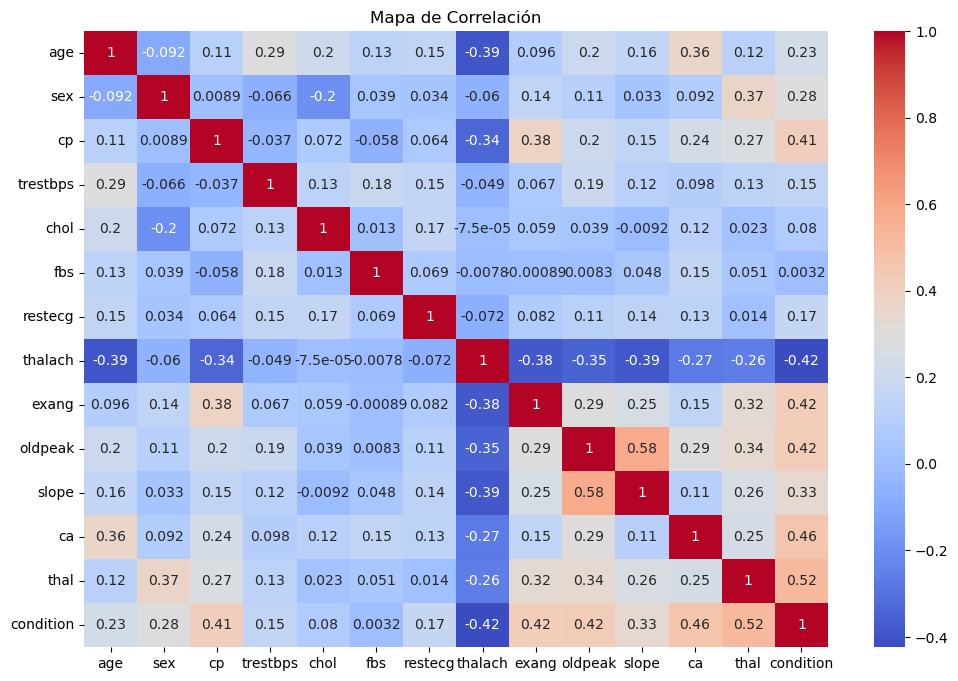


--- Evaluación del modelo ---
Accuracy: 0.7333
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.77      0.72      0.74        32
           1       0.70      0.75      0.72        28

    accuracy                           0.73        60
   macro avg       0.73      0.73      0.73        60
weighted avg       0.74      0.73      0.73        60



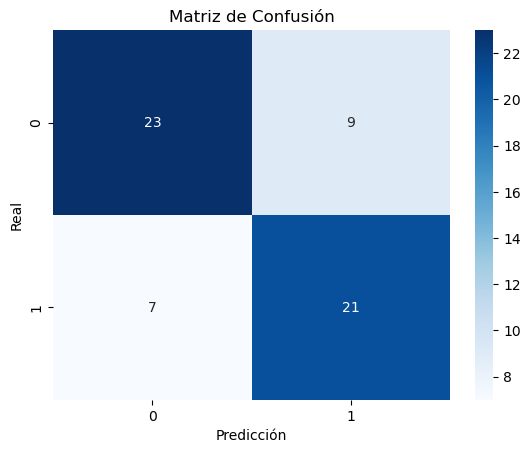

In [4]:
# --- Importar librerías ---
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# --- Cargar dataset ---
ruta = r"C:\Users\SM ZONA GAMER\Documents\UNAD\Quinto semestre\Otros\Analisis de datos\analisis de datos marilú\heart\heart_cleveland_upload.csv"  # ← Cambia esta ruta
df = pd.read_csv(ruta)

# --- Exploración inicial ---
print("Primeras filas:")
print(df.head())

print("\nInformación del dataset:")
print(df.info())

print("\nValores únicos por columna:")
print(df.nunique())

# --- Visualización de correlaciones ---
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Mapa de Correlación")
plt.show()

# --- Preprocesamiento ---
# Eliminar filas con valores faltantes (si los hay)
df.dropna(inplace=True)

# Separar características y variable objetivo
X = df.drop('condition', axis=1)
y = df['condition']  # 0: sin enfermedad, 1: con enfermedad

# División en Train/Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenamiento del modelo
modelo = LogisticRegression(max_iter=1000)
modelo.fit(X_train, y_train)

# Predicción
y_pred = modelo.predict(X_test)

# Evaluación
print("\n--- Evaluación del modelo ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))

# Matriz de confusión
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusión")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()
